# Waze - Exploratory Data Analysis

This work continues the investigation started in the stage of the preliminary data summary, focusing on further analyzing the data and uncovering more details about the variables. The purpose is to carry out exploratory data analysis (EDA) on the dataset of Waze users. Professional data visualizations are created to tell a story and aid data-driven decision-making for business objectives.

In [196]:
import warnings
warnings.filterwarnings('ignore')

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [198]:
# reading the data
df = pd.read_csv("waze_dataset.csv")
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


The data is structured with each row representing a user. However, there are 700 rows with missing values in the "label" column. Other variables do not have missing values. Since our focus is on user churn, the `label` column is critical. Apart from the `label`, variables linked to user behavior will be most relevant, excluding `ID`. The `ID` column can be excluded from the analysis, as it does not contribute to understanding churn (unless the IDs are based on signup time). To check for missing data, we use `df.info()` and inspect the Non-Null Count for each variable. The difference between the Non-Null Count and the total number of rows will reveal missing values. If the missing data is completely random (MCAR), we can safely exclude the affected rows from the analysis. If not, we need to investigate the cause of the missing data to ensure it does not skew the results.

In [200]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Some of the data visualizations that are most useful for understanding this data include bar charts, box plots, scatter plots and histograms. Bar charts are perfect for showing counts and comparisons, especially for categorical data. Box plots help identify outliers and show the spread of key metrics like drives and sessions. Scatter plots reveal relationships between variables. Histograms provide a clear view of how data points are distributed.

In [201]:
def histogrammer(column_str, title, median_text=True, **kwargs):
    """
    This function plots a histogram with an additional median indicator.
    """
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], zorder=3, **kwargs)   # plotting the histogram
    plt.axvline(median, color="red", linestyle="--", zorder=5) # plotting the median line
    if median_text==True:
        ax.text(0.25, 0.85, f"median={median}", color="red",
            ha="left", va="top", transform=ax.transAxes, zorder=5)
    else:
        print("Median:", median)
    plt.title(f"{title} Histogram")
    plt.grid(zorder=0)

Text(0.5, 1.0, 'Drives Boxplot')

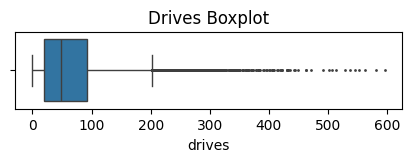

In [202]:
# creating boxplot for the number of drives
plt.figure(figsize=(5,1))
sns.boxplot(x=df["drives"], fliersize=1)
plt.title("Drives Boxplot")

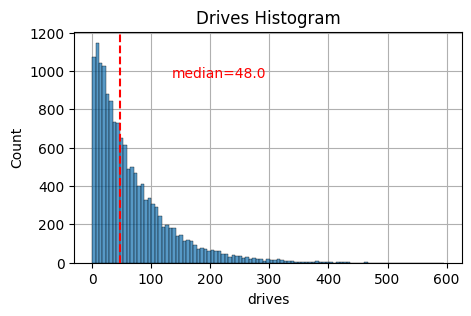

In [203]:
# creating histogram for the number of drives
histogrammer("drives", "Drives")

Text(0.5, 1.0, 'Sessions Boxplot')

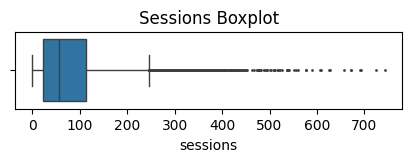

In [204]:
# creating boxplot for the number of sessions
plt.figure(figsize=(5,1))
sns.boxplot(x=df["sessions"], fliersize=1)
plt.title("Sessions Boxplot")

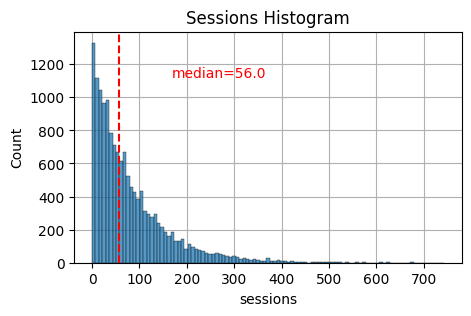

In [205]:
# creating histogram for the number of sessions
histogrammer("sessions", "Sessions")

Text(0.5, 1.0, 'Total Sessions Boxplot')

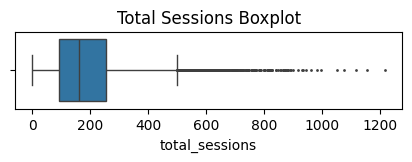

In [206]:
# creating boxplot for the total sessions
plt.figure(figsize=(5,1))
sns.boxplot(x=df["total_sessions"], fliersize=1)
plt.title("Total Sessions Boxplot")

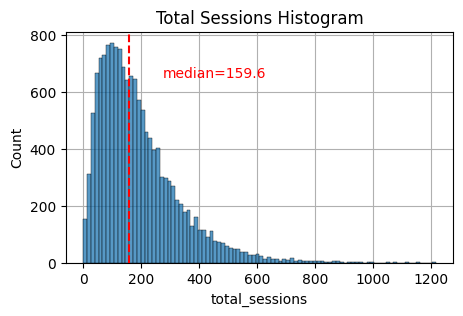

In [207]:
# creating histogram for the total sessions
histogrammer("total_sessions", "Total Sessions")

Text(0.5, 1.0, '# Days After On-Boarding Boxplot')

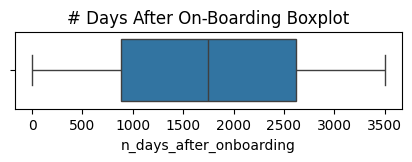

In [208]:
# creating boxplot for the number of days after on-boarding
plt.figure(figsize=(5,1))
sns.boxplot(x=df["n_days_after_onboarding"], fliersize=1)
plt.title("# Days After On-Boarding Boxplot")

Median: 1741.0


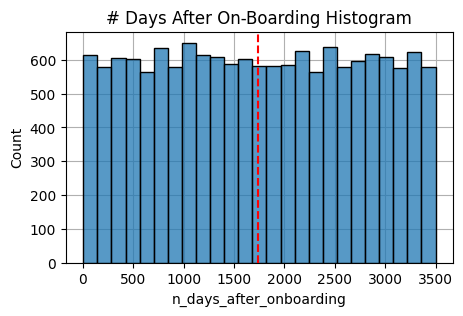

In [209]:
# creating histogram for the number of days after on-boarding
histogrammer("n_days_after_onboarding", "# Days After On-Boarding", median_text=False)

Text(0.5, 1.0, 'Distance Per Drive Boxplot')

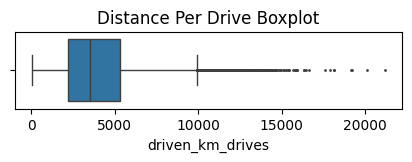

In [210]:
# creating boxplot for the number of driven kilometers per drive
plt.figure(figsize=(5,1))
sns.boxplot(x=df["driven_km_drives"], fliersize=1)
plt.title("Distance Per Drive Boxplot")

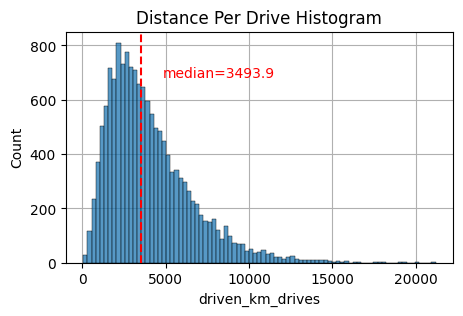

In [211]:
# creating histogram for the number of driven kilometers per drive
histogrammer("driven_km_drives", "Distance Per Drive")

Text(0.5, 1.0, 'Duration Per Drive Boxplot')

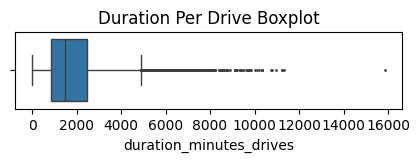

In [212]:
# creating boxplot for the duration in minutes per drive
plt.figure(figsize=(5,1))
sns.boxplot(x=df["duration_minutes_drives"], fliersize=1)
plt.title("Duration Per Drive Boxplot")

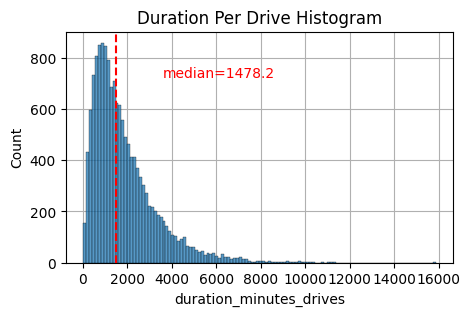

In [213]:
# creating histogram for the duration in minutes per drive
histogrammer("duration_minutes_drives", "Duration Per Drive")

Text(0.5, 1.0, 'Activity Days Boxplot')

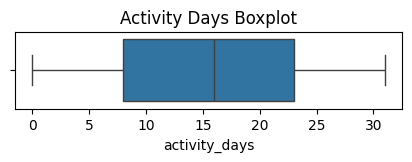

In [214]:
# creating boxplot for the activity days
plt.figure(figsize=(5,1))
sns.boxplot(x=df["activity_days"], fliersize=1)
plt.title("Activity Days Boxplot")

Median: 16.0


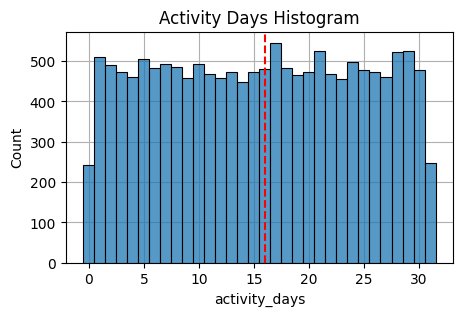

In [215]:
# creating histogram for the activity days
histogrammer("activity_days", "Activity Days", median_text=False, discrete=True)

Text(0.5, 1.0, 'Driving Days Boxplot')

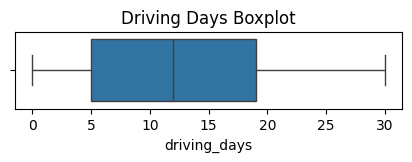

In [216]:
# creating boxplot for the driving days
plt.figure(figsize=(5,1))
sns.boxplot(x=df["driving_days"], fliersize=1)
plt.title("Driving Days Boxplot")

Median: 12.0


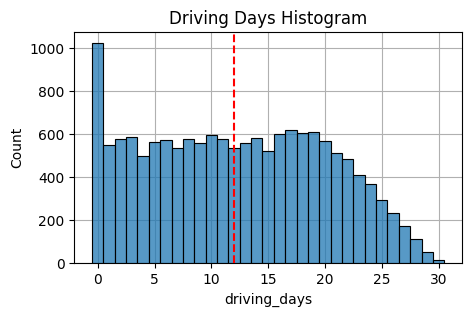

In [217]:
# creating histogram for the driving days
histogrammer("driving_days", "Driving Days", median_text=False, discrete=True)

Text(0.5, 1.0, 'Retained Users vs. Churned Users')

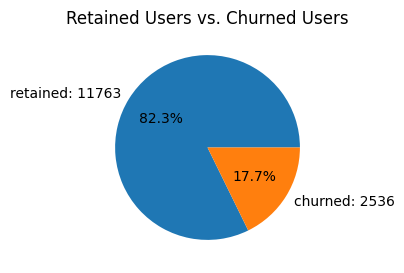

In [218]:
# creating pie chart for the labels
fig = plt.figure(figsize=(3,3))
data=df["label"].value_counts()
plt.pie(data,
        labels=[f"{data.index[0]}: {data.values[0]}",
                f"{data.index[1]}: {data.values[1]}"],
        autopct="%1.1f%%"
        )
plt.title("Retained Users vs. Churned Users")

Text(0.5, 1.0, 'Users By Device')

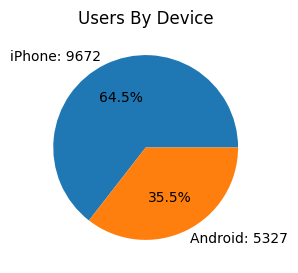

In [219]:
# creating pie chart for the devices
fig = plt.figure(figsize=(3,3))
data=df["device"].value_counts()
plt.pie(data,
        labels=[f"{data.index[0]}: {data.values[0]}",
                f"{data.index[1]}: {data.values[1]}"],
        autopct="%1.1f%%"
        )
plt.title("Users By Device")

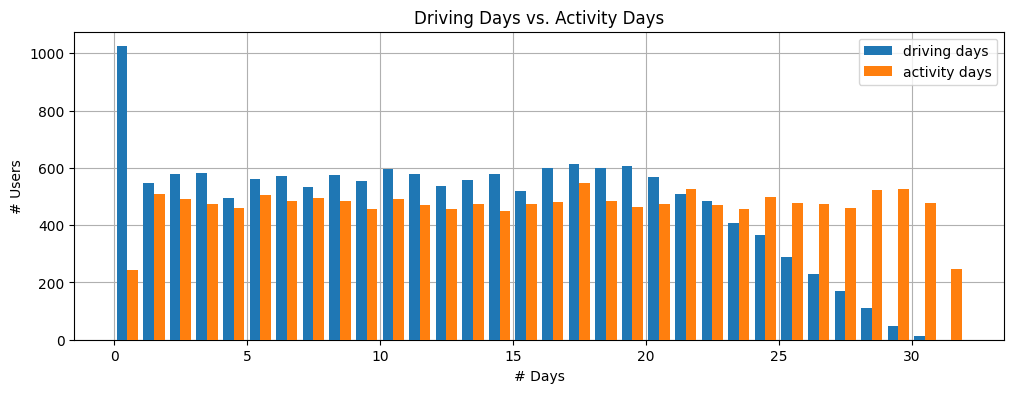

In [232]:
# creating histogram for the driving days and activity days
plt.figure(figsize=(12,4))
label=["driving days", "activity days"]
plt.hist([df["driving_days"], df["activity_days"]],
         bins=range(0,33),
         label=label,
         zorder=3)
plt.xlabel("# Days")
plt.ylabel("# Users")
plt.legend()
plt.title("Driving Days vs. Activity Days")
plt.grid(zorder=0)

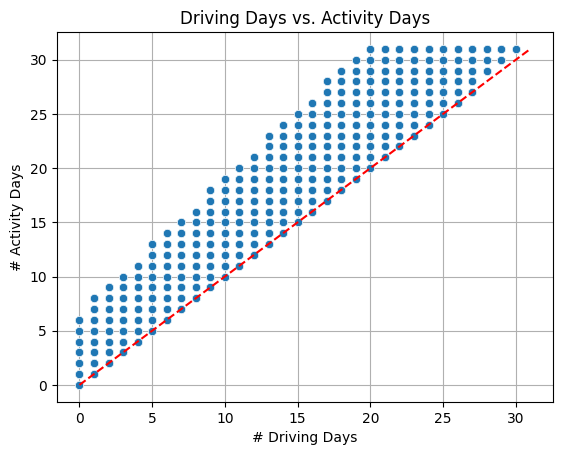

In [231]:
# creating scatterplot for the driving days and activity days
sns.scatterplot(data=df, x="driving_days", y="activity_days", zorder=3)
plt.title("Driving Days vs. Activity Days")
plt.plot([0,31], [0,31], color="red", linestyle="--", zorder=5)
plt.xlabel("# Driving Days")
plt.ylabel("# Activity Days")
plt.grid(zorder=0)

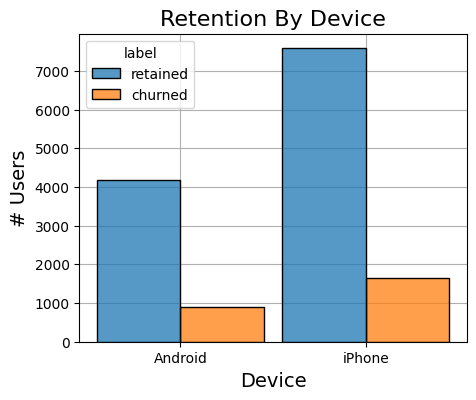

In [222]:
# creating histogram for the devices based on label
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x="device",
             hue="label",
             multiple="dodge",
             shrink=0.9,
             zorder=3
             )
plt.ylabel("# Users", fontsize=14)
plt.xlabel("Device", fontsize=14)
plt.title("Retention By Device", fontsize=16)
plt.grid(zorder=0)

In [223]:
# creating a column for the distance per driving day
df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]

# converting infinite values to zero
df.loc[df["km_per_driving_day"]==np.inf, "km_per_driving_day"] = 0

# creating a column for the percentage of sessions in the last month
df["percent_sessions_in_last_month"] = df["sessions"] / df["total_sessions"]

df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,578.963113,0.449255
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110,1.530637


Text(0.5, 1.0, 'Churn Rate By Mean Km Per Driving Day')

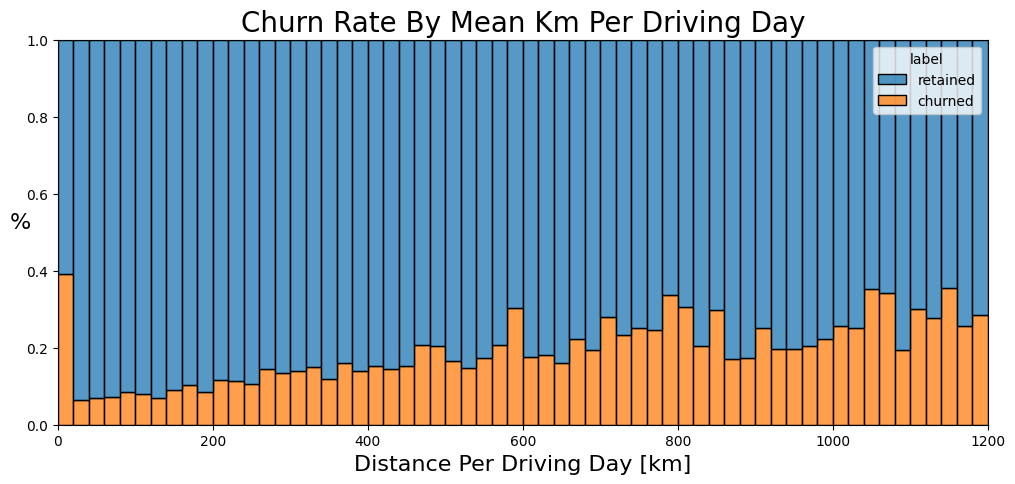

In [224]:
# creating histogram for the distance per driving day based on label
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x="km_per_driving_day",
             bins=range(0,1201,20),
             hue="label",
             multiple="fill")
plt.ylabel("%", rotation=0, fontsize=16)
plt.xlabel("Distance Per Driving Day [km]", fontsize=16)
plt.title("Churn Rate By Mean Km Per Driving Day", fontsize=20)

Text(0.5, 1.0, 'Churn Rate Per Driving Day Number')

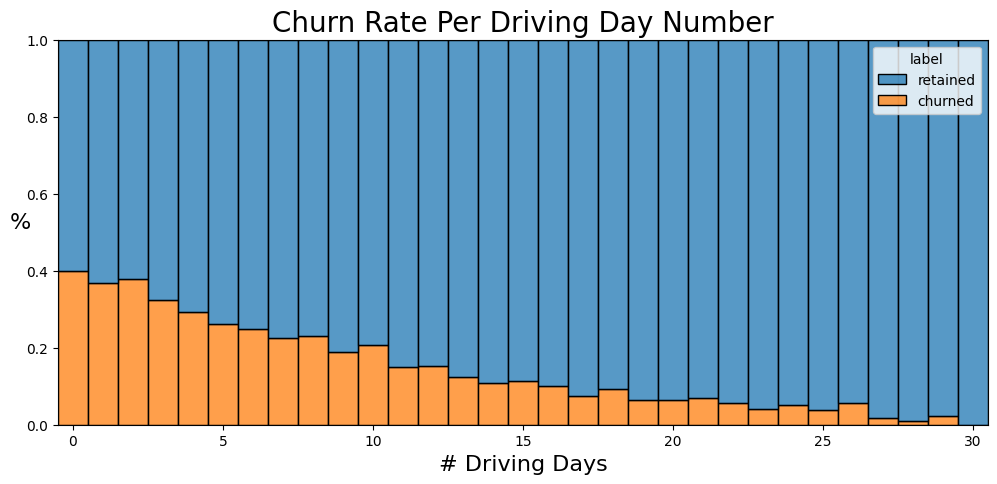

In [225]:
# creating histogram for the driving days based on label
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x="driving_days",
             bins=range(1,32),
             hue="label",
             multiple="fill",
             discrete=True)
plt.ylabel("%", rotation=0, fontsize=16)
plt.xlabel("# Driving Days", fontsize=16)
plt.title("Churn Rate Per Driving Day Number", fontsize=20)

Median: 0.4


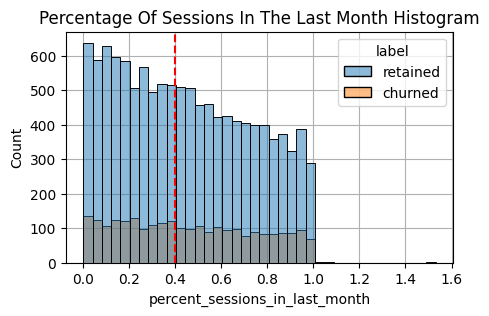

In [226]:
# creating histogram for the percentage of sessions in the last month
histogrammer("percent_sessions_in_last_month",
             "Percentage Of Sessions In The Last Month",
             hue=df["label"],
             multiple="layer",
             median_text=False)

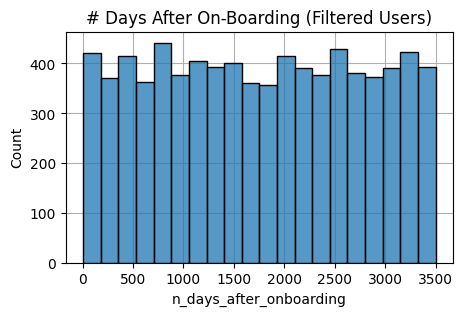

In [227]:
# creating histogram for the number of days after on-boarding by filtering the percentage of sessions
data = df.loc[df["percent_sessions_in_last_month"] >= 0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data["n_days_after_onboarding"], zorder=3)
plt.title("# Days After On-Boarding (Filtered Users)")
plt.grid(zorder=0)

The variable for the sessions is highly skewed, with 50% of users having 56 or fewer sessions, but some exceed 700. The variable for the drives follows a similar pattern, skewed with a median of 48 but some users reporting over 400 drives in the last month. The variable for the total sessions is also skewed, with a median of 160. Given that the median monthly session count is 56, a large portion of a user"s total drives may occur within the last month. The distribution of the variable for the user tenure (days since signup) is uniform, ranging from nearly zero to 9.5 years. The variable for the driving distances varies, with half of users driving less than 3,495 kilometers last month. Some drove over 20,000 km, which is highly irregular.

In [228]:
def outlier_imputer(column_name, percentile):
    # calculating the threshold
    threshold = df[column_name].quantile(percentile)

    # imputing threshold for values greater than the threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print("{:>25} | percentile: {} | threshold: {}".format(column_name, percentile, threshold))

In [229]:
lst_column = ["sessions", "drives", "total_sessions", "driven_km_drives", "duration_minutes_drives"]
for column in lst_column:
    outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


Users opened the app a median of 16 times last month. The distribution was nearly uniform, with ~500 people opening the app on any given number of days. Roughly 250 users did not open the app at all, and 250 opened it daily. Additionally, there is a strong correlation between the activity days and the driving days. However, almost twice as many users did not drive compared to those who did not open the app, which requires further investigation. Regarding the devices, there are nearly twice as many iPhone users as Android users. It should also be noted that less than 18% of users churned, while the rest were retained.

In [230]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


Overall, users with more app sessions or drives are less likely to churn. Long-distance drivers tend to churn more frequently. The number of sessions and drives have right-skewed distributions, indicating that most users have lower engagement. Additionally, anomalies exist in some variables (e.g. extreme distance values), requiring further investigation. EDA is essential because it helps data professionals familiarize themselves with the data, identify outliers, clean missing values and prepare the data for modeling. Finally, visualizations helped us understand that this dataset contains outliers and decisions will need to be made about how to handle them before modeling.